In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import re
import os

from PIL import Image


# Sample data dictionary (replace this with your actual data)

llm = '7b-fixed'

data = pickle.load(open(os.path.join("../", llm+"-results-oos.txt"), "rb" ))

# data type
print(type(data))

# data info
print(data.keys())

<class 'dict'>
dict_keys(['sports_prison', 'sports_delight', 'sports_staghunt', 'sports_snowdrift', 'roomsharing_prison', 'roomsharing_delight', 'roomsharing_staghunt', 'roomsharing_snowdrift', 'ventcap_prison', 'ventcap_delight', 'ventcap_staghunt', 'ventcap_snowdrift'])


In [54]:
# check for invalid values
for key in data.keys():
    for item in data[key]:
        if item != '  C' and item != '  D':
            print(key, item)

In [55]:
# create a function to show the distribution of the data
# return a dictionary, with keys as the keys of the input dictionary, and values as the distribution of the data
def show_distribution(data):
    distribution = {}
    for key in data.keys():
        distribution[key] = {}
        for item in data[key]:
            if item not in distribution[key]:
                distribution[key][item] = 1
            else:
                distribution[key][item] += 1
    return distribution

# show the distribution of the data
distribution = show_distribution(data)

# save the distribution to a .txt file
with open(os.path.join("../", llm+"_distribution.txt"), "x") as f:
    for key in distribution.keys():
        # write each line like this: key: {item1: count1, item2: count2}
        f.write(key + ': ' + str(distribution[key]) + '\n')

print('Distribution saved to ' + llm + '_distribution.txt')

FileExistsError: [Errno 17] File exists: '../7b-fixed_distribution.txt'

In [56]:
# read dictionary from .txt file
def read_distribution(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    distribution = {}
    for line in lines:
        # each line is like this: key: {item1: count1, item2: count2}
        # first, split by the first ': ' to get the key
        # then, split by the '{' and '}' to get the value
        key, value = line.split(': {')
        value = value[0:-2].split(', ')
        value = {item.split(': ')[0][1:-1]: int(item.split(': ')[1]) for item in value}
        distribution[key] = value
    return distribution

# show the distribution
# print(distribution)

all_data = {}
llms = ['7b-fixed', '7b-fined', '70b-fixed']
for llm in llms:
    distribution = read_distribution(os.path.join("../", llm+"_distribution.txt"))
    all_data[llm] = distribution
    
# save the all_data dictionary to a .txt file
with open(os.path.join("../", "all_data_reasoning.txt"), "w") as f:
    f.write(str(all_data))
    
print('All data saved to all_data.txt')

# save to a .pkl file
pickle.dump(all_data, open(os.path.join("../", "all_data_reasoning.pkl"), "wb"))

print('All data saved to all_data.pkl')

All data saved to all_data.txt
All data saved to all_data.pkl


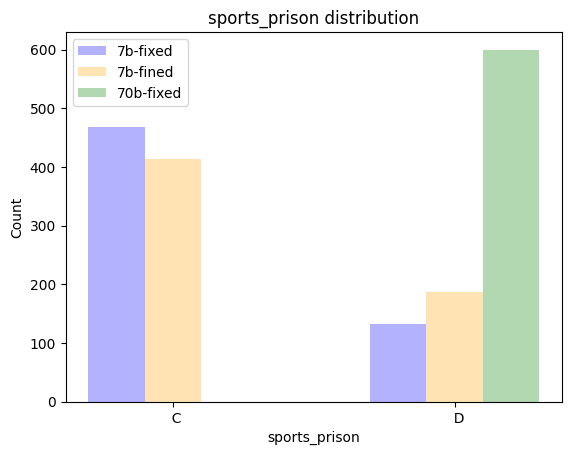

sports_prison


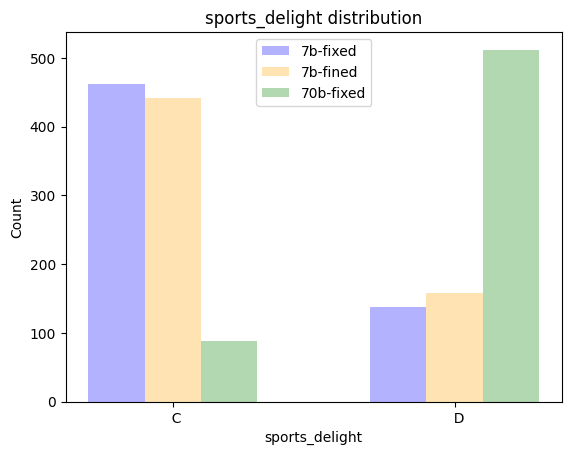

sports_delight


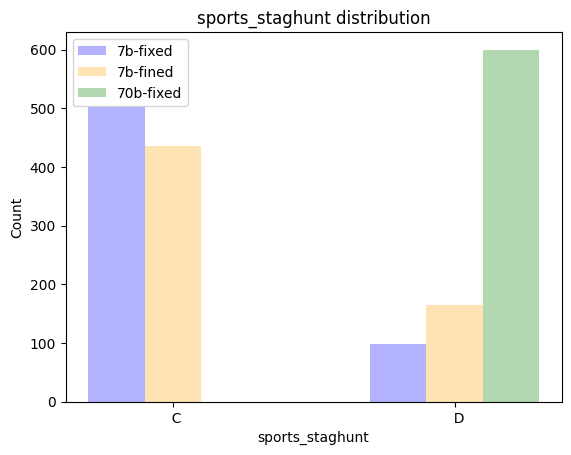

sports_staghunt


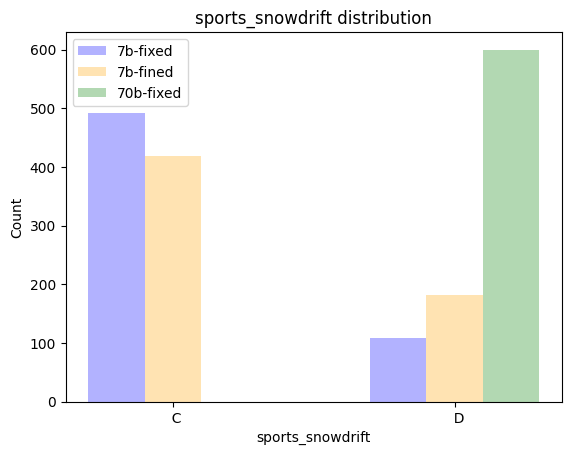

sports_snowdrift


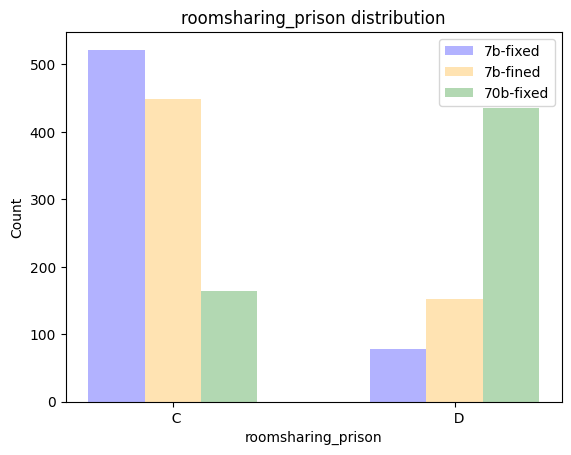

roomsharing_prison


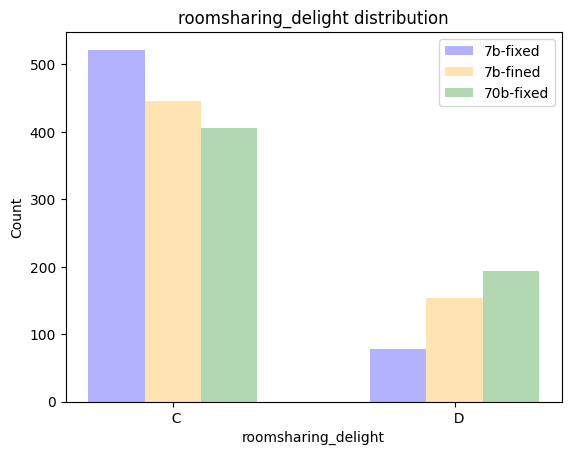

roomsharing_delight


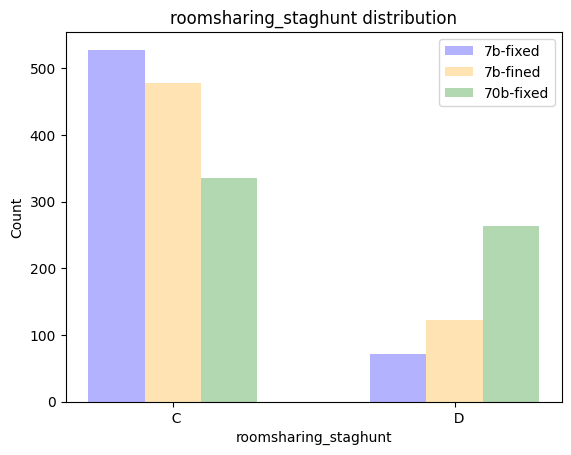

roomsharing_staghunt


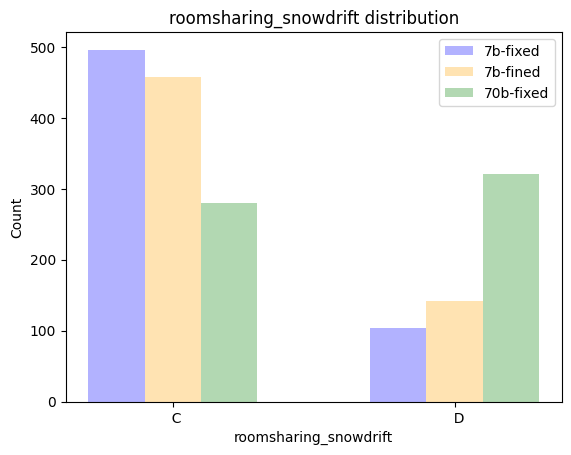

roomsharing_snowdrift


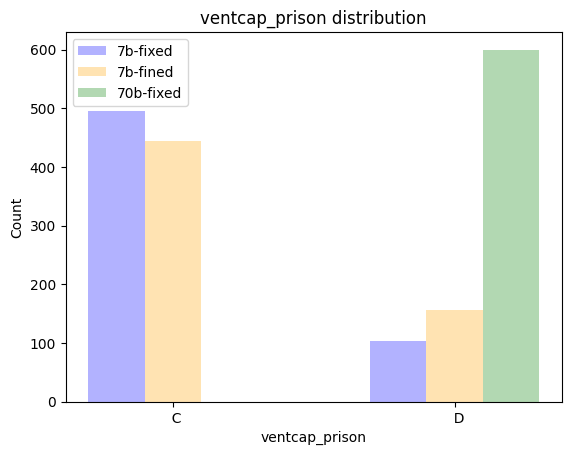

ventcap_prison


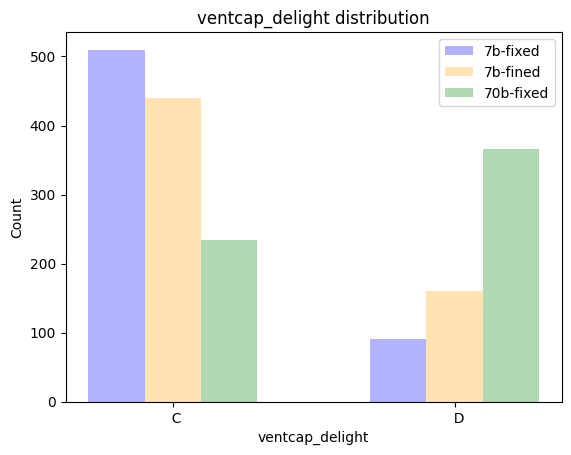

ventcap_delight


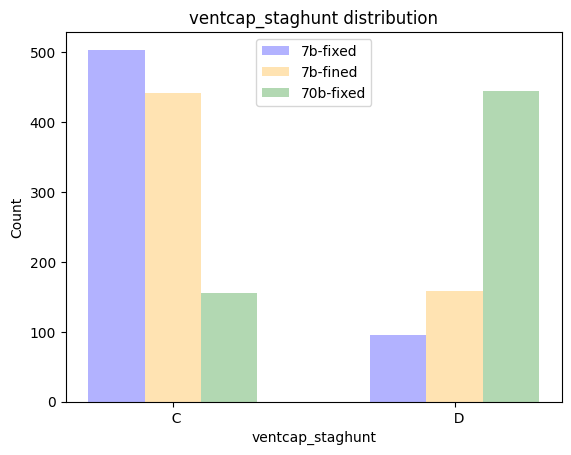

ventcap_staghunt


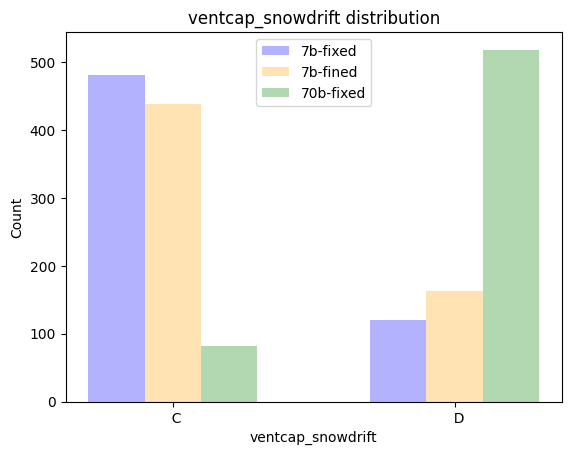

ventcap_snowdrift


In [57]:
def compare_distribution_for_each_game(all_data, game):
    plt.figure()
    bar_width = 0.2  # Width of each bar
    bar_positions = []  # List to store the x positions of bars

    for index, llm in enumerate(all_data.keys()):
        valid_keys = all_data[llm][game].keys()
        # Generate x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_keys))]
        bar_positions.append(x)
        # color = 'b' if llm == '7b_org' else 'orange' if llm == '7b_finetuned' else 'red'
        color = 'blue' if llm == '7b-fixed' else 'orange' if llm == '7b-fined' else 'green'
        plt.bar(x, all_data[llm][game].values(), width=bar_width, alpha=0.3, label=llm, color=color)

    # Adjust xticks to the middle of the grouped bars
    plt.xticks([pos + bar_width * (len(all_data) - 1) / 2 for pos in range(len(valid_keys))], valid_keys)

    plt.xlabel(game)
    plt.ylabel('Count')
    plt.title(game + ' distribution')
    plt.legend()
    plt.show()

# compare the distribution of different models
def compare_distribution(all_data, keys):
    for key in keys:
        compare_distribution_for_each_game(all_data, key)
        print(key)

# compare the distribution of different models
keys = [item for item in data.keys()]
compare_distribution(all_data, keys)

In [68]:
from collections import defaultdict

categorized_keys = defaultdict(list)
for item in keys:
    prefix = item.split('_')[1]  # Get the prefix before the underscore
    categorized_keys[prefix].append(item)
# 0 is for context, 1 is for game

# Extract values from the dictionary to get the list of lists
categorized_keys

defaultdict(list,
            {'prison': ['sports_prison',
              'roomsharing_prison',
              'ventcap_prison'],
             'delight': ['sports_delight',
              'roomsharing_delight',
              'ventcap_delight'],
             'staghunt': ['sports_staghunt',
              'roomsharing_staghunt',
              'ventcap_staghunt'],
             'snowdrift': ['sports_snowdrift',
              'roomsharing_snowdrift',
              'ventcap_snowdrift']})

In [70]:
def aggregated_comparison_by_category(all_data, category, category_type):
    llms = all_data.keys()
    plt.figure(figsize=(10, 5))
    bar_width = 0.2
    llm_colors = {'7b-fixed': 'blue', '7b-fined': 'orange', '70b-fixed': 'green'}  # Add colors for other LLMs as needed
    legend_handles = []
    
    for index, llm in enumerate(llms):
        distribution = all_data[llm]

        # filter games in distribution that have the context in the name
        valid_games = [game for game in distribution.keys() if category in game]
        
        # set the x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_games))]
        
        for i, game in enumerate(valid_games):
            # only show the value for key: '  C'
            color = llm_colors[llm]
            print(llm, game, distribution[game]['  C'], x[i])
            plt.bar(x[i], distribution[game]['  C'], width=bar_width, alpha=0.5, label=game, color=color)
            
        # Add legend entry for current LLM
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.5, edgecolor='none'))
    
    # edited valid games should remove its context part if the category is 'Context'
    # edited valid games should remove its game part if the category is 'Game'
    if category_type == 'Game':
        edited_valid_games = [re.sub(r'_.*', '', game) for game in valid_games]
    else:
        edited_valid_games = [re.sub(r'.*_', '', game) for game in valid_games]
    print(valid_games)
    print(edited_valid_games)
    valid_games = edited_valid_games
    
    plt.xticks([pos + bar_width * (len(valid_games) - 1) / 3 for pos in range(len(valid_games))], valid_games, fontsize=15)
    # set the xticks size to be larger
    
    plt.xlabel(category, fontsize=15)
    plt.ylabel('Cooperation', fontsize=15)
    plt.title(f'{category_type} {category} distribution', fontdict={'fontsize': 16})
    plt.legend(legend_handles, llms, loc='lower right', title='LLM')
    # save plot
    if category_type == 'Context':
        plt.savefig(os.path.join("../oos_figs/context", category + '_distribution.png'))
    else:
        plt.savefig(os.path.join("../oos_figs/game", category + '_distribution.png'))
    plt.close()

for category in categorized_keys:
    aggregated_comparison_by_category(all_data, category, category_type='Game')



7b-fixed sports_prison 468 0.0
7b-fixed roomsharing_prison 522 1.0
7b-fixed ventcap_prison 496 2.0
7b-fined sports_prison 414 0.2
7b-fined roomsharing_prison 448 1.2
7b-fined ventcap_prison 444 2.2
70b-fixed sports_prison 0 0.4
70b-fixed roomsharing_prison 164 1.4
70b-fixed ventcap_prison 0 2.4
['sports_prison', 'roomsharing_prison', 'ventcap_prison']
['sports', 'roomsharing', 'ventcap']
7b-fixed sports_delight 462 0.0
7b-fixed roomsharing_delight 522 1.0
7b-fixed ventcap_delight 510 2.0
7b-fined sports_delight 442 0.2
7b-fined roomsharing_delight 446 1.2
7b-fined ventcap_delight 440 2.2
70b-fixed sports_delight 88 0.4
70b-fixed roomsharing_delight 406 1.4
70b-fixed ventcap_delight 234 2.4
['sports_delight', 'roomsharing_delight', 'ventcap_delight']
['sports', 'roomsharing', 'ventcap']
7b-fixed sports_staghunt 502 0.0
7b-fixed roomsharing_staghunt 528 1.0
7b-fixed ventcap_staghunt 504 2.0
7b-fined sports_staghunt 436 0.2
7b-fined roomsharing_staghunt 478 1.2
7b-fined ventcap_staghunt 4

In [79]:
def merge_images(folder_path, output_path):
    # merge three .png files into one .png file, using the following layout:
    # 1 2
    #  3

    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 2 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (width // 2, height))
        
    
    # make the empty space in the left and right of the middle image white
    for j in range(height):
        for i in range(width//2):
            new_image.putpixel((i, height + j), (255, 255, 255))
        for i in range(width*3//2, 2*width):
            new_image.putpixel((i, height + j), (255, 255, 255))
       
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)

merge_images(os.path.join("../oos_figs/context"), os.path.join("../oos_figs", "context_distribution.png"))

Images merged and saved to ../oos_figs\context_distribution.png


In [77]:
def merge_images_of_four(folder_path, output_path):
    # merge four .png files into one .png file, using the following layout:
    # 1 2
    # 3 4
    
    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 2 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (0, height))
    new_image.paste(images[3], (width, height))
    
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)
    
merge_images_of_four(os.path.join("../oos_figs/game"), os.path.join("../oos_figs", "game_distribution.png"))

Images merged and saved to ../oos_figs\game_distribution.png


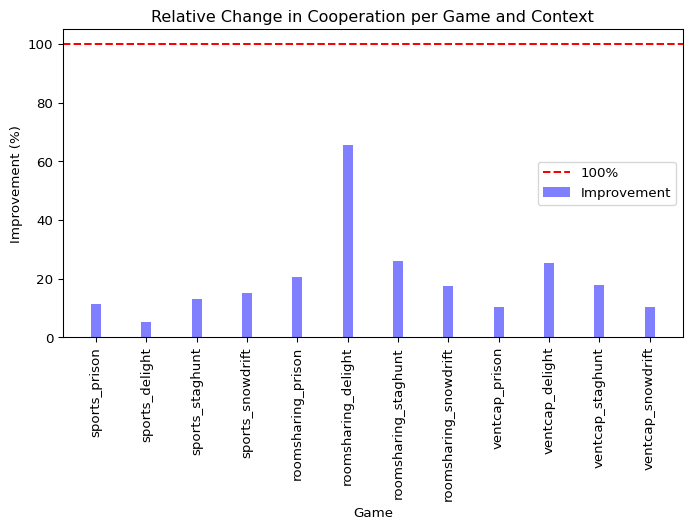

In [89]:
# for each game and context, the goal of finetuning was to reach the results of the 70b model
# so the initial model is 7b_org, the finetuned model is 7b_finetuned, and the target model is 70b
# given this, compare the progress of 7b_org and 7b_finetuned towards 70b by this formula:
# progress = (7b_finetuned - 7b_org) / (70b - 7b_org) * 100

def compare_progress(all_data, keys):
    my_dpi = 96
    plt.figure(figsize=(800/my_dpi, 400/my_dpi), dpi=my_dpi)

    # plt.figure(figsize=(10, 5))
    bar_width = 0.2
    bar_positions = []

    progress = [(all_data['7b-fined'][key]['  C'] - all_data['7b-fixed'][key]['  C']) / (all_data['70b-fixed'][key]['  C'] - all_data['7b-fixed'][key]['  C']) * 100 for key in keys]
    x = [pos for pos in range(len(keys))]        
    plt.bar(x, progress, width=bar_width, alpha=0.5, label='Improvement', color='blue')
    # draw a line at y=100
    plt.axhline(y=100, color='red', linestyle='--', label='100%')
    # plot logaritmic scale
    # plt.yscale('log')
    # plt.axhline(y=0, color='black', linestyle='--', label='0%')
    plt.xticks([pos for pos in range(len(keys))], keys, rotation=90)
    plt.xlabel('Game')
    plt.ylabel('Improvement (%)')
    plt.title('Relative Change in Cooperation per Game and Context')
    plt.legend(loc='best')
    # plt.savefig(os.path.join("../new_figs", "progress.png"), dpi=my_dpi)
    plt.show()
    
    
compare_progress(all_data, keys)